# COMP4121 Project - How do I influence people on online social network?
###### created by yisong jiang(z5123920)

## What's in this notebook? How to read it?
All the implementing, examples, testings of this project.
<br>The cell with in[] is python code cell that can be run and running result will be below of it

## Topology Based Influence Models
### Measuring node importance
We now use the example network in the textbook to calculate the 4 approaches to measure node importance
![](src/1.png)

In [90]:
#import the modules that we will use in this project
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings
import networkx as nx
warnings.filterwarnings("ignore")

### build my own graph and define implement functions 

In [19]:
# simply bidirected node
class node():
    def __init__(self,value,name):
        self.value = value
        self.connected_nodes = []
        self.name = name
# general setup
# add nodes into the graph as well as their neighbours
node1 = node(1,'N1')
node2 = node(2,'N2')
node3 = node(3,'N3')
node4 = node(4,'N4')
node5 = node(5,'N5')
node6 = node(6,'N6')
node7 = node(7,'N7')
node8 = node(8,'N8')
node1.connected_nodes.extend([node2,node3,node4])
node2.connected_nodes.extend([node1,node4,node5])
node3.connected_nodes.extend([node1,node6,node7,node8])
node4.connected_nodes.extend([node1,node2,node5])
node5.connected_nodes.extend([node2,node4])
node6.connected_nodes.extend([node7,node3])
node7.connected_nodes.extend([node6,node3,node8])
node8.connected_nodes.extend([node7,node3])

nodelist = [node1,node2,node3,node4,node5,node6,node7,node8]
num_node = len(nodelist)


In [23]:
# adjacency matrix
def adjacency():
    adjacency = []
    for nd in nodelist:
        adj_vector = []
        for ond in nodelist:
            if (ond in nd.connected_nodes):
                adj_vector.append(1)
            else:
                adj_vector.append(0)
        adjacency.append(adj_vector)
    adjacency = np.matrix(adjacency)
    w,v =np.linalg.eig(adjacency)
    print("Adjacency matrix:")
    print(adjacency)
adjacency()

Adjacency matrix:
[[0 1 1 1 0 0 0 0]
 [1 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 1 1]
 [1 1 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 1]
 [0 0 1 0 0 0 1 0]]


Eigenvector centrality
![](src/2.png)

In [21]:
#Eigenvector centrality
w,v =np.linalg.eig(adjacency)
print("Largest eigenvalue:",w[0])
print("Eigenvector centrality for nodes:\n",v.T[0][0])

Largest eigenvalue: 2.87227621285
Eigenvector centrality for nodes:
 [[ 0.40631618  0.34551743  0.47601744  0.34551743  0.24058789  0.29492475
   0.37108789  0.29492475]]


In [24]:
def shortest_path(start,end):
    if start == end:
        return 0,'X','X'
    path = [[start]]
    while(True):
        allnode = []
        for subpath in path:
            allnode.extend(subpath)
        if end in allnode:
            break
        newpath = []
        for subpath in path:
            lastnode = subpath[-1]
            for node in lastnode.connected_nodes:
                if not node in subpath:
                    newpath.append(subpath+[node])
        path = newpath
    path_with_name = []
    for subpath in path:
        if not end in subpath:
            continue
        sub = []
        for s in subpath:
            sub.append(s.name)
        path_with_name.append(sub)
    num_of_shortest_path = len(path_with_name)
    length_of_shortest_path = len(path_with_name[0])-1
    return length_of_shortest_path,num_of_shortest_path,path_with_name

print("Length of shortest path between two nodes:")
for i in range(num_node):
    for j in range(num_node):
        if not i == j:
            length,_,_ = shortest_path(nodelist[i],nodelist[j])
            print("D"+str(i+1)+str(j+1)+":",length,end = ' ')
    print()
            

Length of shortest path between two nodes:
D12: 1 D13: 1 D14: 1 D15: 2 D16: 2 D17: 2 D18: 2 
D21: 1 D23: 2 D24: 1 D25: 1 D26: 3 D27: 3 D28: 3 
D31: 1 D32: 2 D34: 2 D35: 3 D36: 1 D37: 1 D38: 1 
D41: 1 D42: 1 D43: 2 D45: 1 D46: 3 D47: 3 D48: 3 
D51: 2 D52: 1 D53: 3 D54: 1 D56: 4 D57: 4 D58: 4 
D61: 2 D62: 3 D63: 1 D64: 3 D65: 4 D67: 1 D68: 2 
D71: 2 D72: 3 D73: 1 D74: 3 D75: 4 D76: 1 D78: 1 
D81: 2 D82: 3 D83: 1 D84: 3 D85: 4 D86: 2 D87: 1 


![](src/3.png)

In [33]:
closeness_centrality = []
G = []
for node in nodelist:
    num_other_node = num_node-1
    len_sum = 0
    tmp = []
    for other_node in nodelist:
        length,num,_ = shortest_path(node,other_node)
        len_sum = len_sum + length
        tmp.append(num)
    G.append(tmp)
    closeness_centrality.append(num_other_node/len_sum)
print("closeness_centrality for nodes:")
print(closeness_centrality)
print("matrix G for nodes:")
G = np.matrix(G)
print(G)

closeness_centrality for nodes:
[0.6363636363636364, 0.5, 0.6363636363636364, 0.5, 0.3684210526315789, 0.4375, 0.4666666666666667, 0.4375]
matrix G for nodes:
[['X' '1' '1' '1' '2' '1' '1' '1']
 ['1' 'X' '1' '1' '1' '1' '1' '1']
 ['1' '1' 'X' '1' '2' '1' '1' '1']
 ['1' '1' '1' 'X' '1' '1' '1' '1']
 ['2' '1' '2' '1' 'X' '2' '2' '2']
 ['1' '1' '1' '1' '2' 'X' '1' '2']
 ['1' '1' '1' '1' '2' '1' 'X' '1']
 ['1' '1' '1' '1' '2' '2' '1' 'X']]


In [34]:
def num_in_path(target):
    N = []
    for node in nodelist:
        length = len(nodelist)
        if node == target:
            N.append(length*['X'])
            continue
        tmp = []
        for othernode in nodelist:
            if othernode == target or othernode == node:
                tmp.append('X')
                continue
            count = 0
            _,_,paths = shortest_path(node,othernode)
            for subpath in paths:
                if target.name in subpath:
                    count = count+1
            tmp.append(count)
        N.append(tmp)
    N = np.matrix(N)
    return N
print('N1:\n',num_in_path(node1))
print('N2:\n',num_in_path(node2))

N1:
 [['X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 ['X' 'X' '1' '0' '0' '1' '1' '1']
 ['X' '1' 'X' '1' '2' '0' '0' '0']
 ['X' '0' '1' 'X' '0' '1' '1' '1']
 ['X' '0' '2' '0' 'X' '2' '2' '2']
 ['X' '1' '0' '1' '2' 'X' '0' '0']
 ['X' '1' '0' '1' '2' '0' 'X' '0']
 ['X' '1' '0' '1' '2' '0' '0' 'X']]
N2:
 [['X' 'X' '0' '0' '1' '0' '0' '0']
 ['X' 'X' 'X' 'X' 'X' 'X' 'X' 'X']
 ['0' 'X' 'X' '0' '1' '0' '0' '0']
 ['0' 'X' '0' 'X' '0' '0' '0' '0']
 ['1' 'X' '1' '0' 'X' '1' '1' '1']
 ['0' 'X' '0' '0' '1' 'X' '0' '0']
 ['0' 'X' '0' '0' '1' '0' 'X' '0']
 ['0' 'X' '0' '0' '1' '0' '0' 'X']]


![](src/4.png)

In [189]:
def betweenness_centrality(n):
    N = num_in_path(n)
    indx = nodelist.index(n)
    ss = 0
    for i in range(num_node):
        for j in range(i+1,num_node):
            if (not i == indx) and (not j == indx):
                ss = ss + (float(N[i,j])/float(G[i,j]))
    return ss

print('B1:{:.2f}'.format(betweenness_centrality(node1)))
print('B2:{:.2f}'.format(betweenness_centrality(node2)))

B1:12.00
B2:2.50


### Measuring link importance

In [79]:
def num_link_in_path(v1,v2):
    N = []
    for node in nodelist:
        tmp = []
        for othernode in nodelist:
            if othernode == node:
                tmp.append('X')
                continue
            count = 0
            _,_,paths = shortest_path(node,othernode)
            for subpath in paths:
                if v1.name in subpath and v2.name in subpath:
                    ind1 = subpath.index(v1.name)
                    ind2 = subpath.index(v2.name)
                    if abs(ind1-ind2)==1:
                        count = count +1
                    
            tmp.append(count)
        N.append(tmp)
    N = np.matrix(N)
    return N
print("N({},{}):".format(node1.name,node3.name))
print(num_link_in_path(node1,node3))
print("N({},{}):".format(node1.name,node2.name))
print(num_link_in_path(node1,node2))

N(N1,N3):
[['X' '0' '1' '0' '0' '1' '1' '1']
 ['0' 'X' '1' '0' '0' '1' '1' '1']
 ['1' '1' 'X' '1' '2' '0' '0' '0']
 ['0' '0' '1' 'X' '0' '1' '1' '1']
 ['0' '0' '2' '0' 'X' '2' '2' '2']
 ['1' '1' '0' '1' '2' 'X' '0' '0']
 ['1' '1' '0' '1' '2' '0' 'X' '0']
 ['1' '1' '0' '1' '2' '0' '0' 'X']]
N(N1,N2):
[['X' '1' '0' '0' '1' '0' '0' '0']
 ['1' 'X' '1' '0' '0' '1' '1' '1']
 ['0' '1' 'X' '0' '1' '0' '0' '0']
 ['0' '0' '0' 'X' '0' '0' '0' '0']
 ['1' '0' '1' '0' 'X' '1' '1' '1']
 ['0' '1' '0' '0' '1' 'X' '0' '0']
 ['0' '1' '0' '0' '1' '0' 'X' '0']
 ['0' '1' '0' '0' '1' '0' '0' 'X']]


![](src/5.png)

In [191]:
def betweenness_centrality_link(v1,v2):
    N = num_link_in_path(v1,v2)
    ss = 0
    for i in range(num_node):
        for j in range(i+1,num_node):
            ss = ss + (float(N[i,j])/float(G[i,j]))
    return ss
print("Summary:")
print("D1:",len(node1.connected_nodes))
print("D2:",len(node2.connected_nodes))
print("E1:{:.2f}".format(v[0][0,0]))
print("E2:{:.2f}".format(v[1][0,0]))
print("C1:{:.2f}".format(closeness_centrality[0]))
print("C2:{:.2f}".format(closeness_centrality[1]))
print('B1:{:.2f}'.format(betweenness_centrality(node1)))
print('B2:{:.2f}'.format(betweenness_centrality(node2)))
print("B({},{}):".format(node1.name,node3.name),end='')
print(betweenness_centrality_link(node1,node3))
print("B({},{}):".format(node1.name,node2.name),end='')
print(betweenness_centrality_link(node1,node2))

Summary:
D1: 3
D2: 3
E1:0.41
E2:0.35
C1:0.64
C2:0.50
B1:12.00
B2:2.50
B(N1,N3):16.0
B(N1,N2):7.5


### In order to build a more complex graph in later part, I will use a python module "networkx"

In [91]:
mygraph = nx.Graph()
mygraph.add_edge(1,2)
mygraph.add_edge(1,3)
mygraph.add_edge(1,4)
mygraph.add_edge(2,4)
mygraph.add_edge(2,5)
mygraph.add_edge(3,6)
mygraph.add_edge(3,7)
mygraph.add_edge(3,8)
mygraph.add_edge(4,5)
mygraph.add_edge(6,7)
mygraph.add_edge(7,8)
print (mygraph.edges())

[(1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (3, 6), (3, 7), (3, 8), (4, 5), (6, 7), (7, 8)]


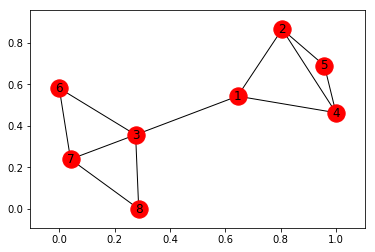

In [121]:
plt.clf()
nx.draw_networkx(mygraph)
plt.show()

The graph above is actually totally same with the example.<br>
Then we use the methods to calcuate 4 attribuates again.<br>
Of course, it is totally same as the result we got in previous approach.

In [188]:
print("Summary:")
print("D1:",mygraph.degree(1))
print("D2:",mygraph.degree(2))
print("E1:{:.2f}".format(nx.eigenvector_centrality(mygraph)[1]))
print("E2:{:.2f}".format(nx.eigenvector_centrality(mygraph)[2]))
print("C1:{:.2f}".format(nx.closeness_centrality(mygraph)[1]))
print("C2:{:.2f}".format(nx.closeness_centrality(mygraph)[2]))
print("B1:{:.2f}".format(nx.betweenness_centrality(mygraph, normalized=False)[1]))
print("B2:{:.2f}".format(nx.betweenness_centrality(mygraph, normalized=False)[2]))
print("B(1,3)",nx.edge_betweenness_centrality(mygraph, normalized=False)[1,3])
print("B(1,2)",nx.edge_betweenness_centrality(mygraph, normalized=False)[1,2])

Summary:
D1: 3
D2: 3
E1:0.41
E2:0.35
C1:0.64
C2:0.50
B1:12.00
B2:2.50
B(1,3) 16.0
B(1,2) 7.5


## Infection Models
![](src/6.png)

### SI model
![](src/7.png)
![](src/8.png)
![](src/9.png)

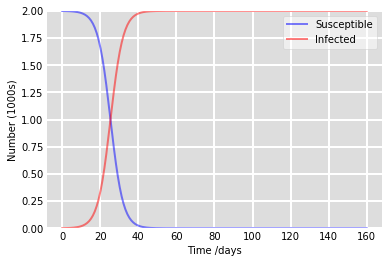

In [194]:
def SI(N = 2000, I0 = 1, beta = 0.3):
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 
    # A grid of time points (in days)
    t = np.linspace(0, 160, 160)
    # The SIR model differential equations.
    def deriv(y, t, N, beta):
        S, I = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N 
        return dSdt, dIdt, 
    # Initial conditions vector
    y0 = S0, I0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta))
    S, I = ret.T
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,N/1000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
SI()

### SIS model
![](src/10.png)
![](src/11.png)

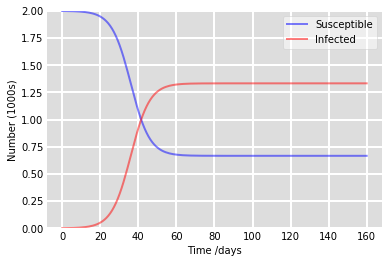

In [145]:
def SIS(N = 2000, I0 = 1, beta = 0.3, gamma = 0.1):
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0
    # A grid of time points (in days)
    t = np.linspace(0, 160, 160)
    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I = y
        dSdt = -beta * S * I / N 
        dIdt = beta * S * I / N - gamma * I
        dSdt = dSdt + gamma * I
        return dSdt, dIdt
    # Initial conditions vector
    y0 = S0, I0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I = ret.T
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,N/1000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
SIS()

### SIR model
![](src/12.png)

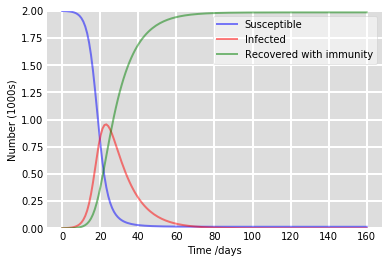

In [195]:
def SIR(N = 2000, I0 = 1, R0 = 0, beta = 0.5, gamma = 0.1):
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    # A grid of time points (in days)
    t = np.linspace(0, 160, 160)
    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,N/1000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
SIR()